In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dane6_fixed.csv')

df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Thu Aug 05 13:43:09 +0000 2021,NaN,NaN,NaN,1,1423278406167187458,tomo9000p,1.423265e+18,918892290927669200,...,430,494,8,NaN,roboter,roboter15,5890,NaN,NaN,False
1,NaN,Thu Aug 05 12:12:01 +0000 2021,NaN,NaN,NaN,0,1423255469389406209,NaN,NaN,NaN,...,938,1335,10,NaN,WIKI WEST,west_wiki,122724,NaN,NaN,False
2,NaN,Thu Aug 05 16:27:30 +0000 2021,NaN,NaN,NaN,0,1423319766320697345,NaN,NaN,NaN,...,617,954,1,Wielka Polska,Przemysław Świrta 🇵🇱🤝🇭🇺,primoszprawy,6612,NaN,https://konfederacja.pl/po-stronie-polski/,False
3,NaN,Thu Aug 05 11:21:15 +0000 2021,NaN,NaN,NaN,0,1423242694114091008,NaN,NaN,NaN,...,3093,5002,7,Polska,stefan wilczyński,stefanwilczysk1,125379,NaN,NaN,False
4,NaN,Thu Aug 05 11:59:30 +0000 2021,NaN,NaN,NaN,0,1423252319706169346,vonfishura,1.423178e+18,863081281,...,13,91,2,NaN,Cukier,Cukier77821679,1602,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,NaN,Wed Jul 28 18:07:34 +0000 2021,Polaków Ukraińców Czechów,NaN,NaN,0,1420445844260761603,NaN,NaN,NaN,...,2928,4153,19,Warszawa,Radca Węgrowicz,RadcaW,601040,NaN,NaN,False
1376,NaN,Wed Jul 28 20:51:14 +0000 2021,NaN,NaN,https://biznesalert.pl/ukraina-chce-konsultacj...,0,1420487031831007234,NaN,NaN,NaN,...,516,272,19,NaN,Piotr Gaglik,PGaglik,166998,NaN,NaN,False
1377,NaN,Wed Jul 28 18:17:04 +0000 2021,NaN,NaN,NaN,0,1420448234250592257,NaN,NaN,NaN,...,526,335,1,Warszawa,Anna Maria,AnnaMar54928634,64514,NaN,NaN,False
1378,NaN,Wed Jul 28 19:41:36 +0000 2021,PilnujmyPolski włączprawdę TVRepublika,NaN,NaN,6,1420469508100198407,NaN,NaN,NaN,...,106895,1165,364,Polska,Telewizja Republika 🇵🇱 #włączprawdę,RepublikaTV,272801,NaN,http://www.tvrepublika.pl,False


Część 1 - przetwarzanie i oczyszczanie danych

- Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
- Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
- Pobierz wszystkie linki do tweetów i przekaż je do listy.
- Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
- Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
- Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords



In [ ]:
#Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at


# skroty dni tygodnia na pełne nazwy
dzień_tyg_mapping = {
  'Mon': 'Poniedziałek',
  'Tue': 'Wtorek',
  'Wed': 'Środa',
  'Thu': 'Czwartek',
  'Fri': 'Piątek',
 'Sat': 'Sobota',
  'Sun': 'Niedziela'
}

def zamień_dni_tyg(skrót):
  return dzień_tyg_mapping.get(skrót, skrót)


df['created_at'] = df['created_at'].apply(zamień_dni_tyg)


In [ ]:
#Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at

def zamień_miesiące(skrót):
  miesiące_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
   'Sep': '09',
   'Oct': '10',
   'Nov': '11',
   'Dec': '12'
    }
  return miesiące_mapping.get(skrót, skrót)

df['user_created_at'] = df['user_created_at'].apply(zamień_miesiące)



In [ ]:
# Pobierz wszystkie linki do tweetów i przekaż je do listy.
import re

def extract_tweet_links(urls):
    tweet_links = []
    if isinstance(urls, str):
        for url in urls.split(","):
            if "twitter.com" in url:
                tweet_links.append(url)
    return tweet_links


all_tweet_links = []
for urls in df['urls']:
  all_tweet_links.extend(extract_tweet_links(urls))


print("Lista linków do tweetów:")
for link in all_tweet_links:
  print(link)

Lista linków do tweetów:
https://twitter.com/TomaszGolonko/status/1423199797364903945
https://twitter.com/WislokaDebica08/status/1423172069555150849
https://twitter.com/Anna1Kwiecien/status/1423141249037524998
https://twitter.com/dumingtups/status/1422966929904619523
https://strana.ua/news/347071-v-senate-podnjali-vopros-o-domashnem-areste-medvedchuka-i-zakrytii-telekanalov-.html https://twitter.com/ZaZdzislaw/status/1422973580040708098
https://twitter.com/PISM_Poland/status/1422848824285011972
https://twitter.com/ArturoZiel0903/status/1422857535934115843
https://kresy24.pl/kijow-policja-zatrzymala-mezczyzne-z-granatem-ktory-wtargnal-do-pomieszczen-kancelarii-rady-ministrow/ https://twitter.com/m_pasierb/status/1422832573684846592
https://twitter.com/censor_net/status/1422889900119109636
https://twitter.com/MatkaPredstave/status/1422829802319454210
https://twitter.com/MStefan92/status/1422620148050141185?s=19
https://twitter.com/PLsalamanderPL/status/1422801020636340228
https://twitter

In [ ]:
#Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)

def extract_links(tweet):
  return re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweet)

all_tweet_links = []
for urls in df['urls']:
  if isinstance(urls, str):
   all_tweet_links.extend(extract_links(urls))

print("Lista linków:")
for link in all_tweet_links:
  print(link)

Lista linków:
https://ift.tt/3fxx9kq
https://twitter.com/TomaszGolonko/status/1423199797364903945
https://help.twitch.tv/s/article/local-sub-price-countries?language=en_US
https://www.ukrinform.pl/rubric-economy/3292538-ukraina-wyemituje-obligacje-na-sume-20-mld-w-ramach-programu-dostepna-hipoteka.html
https://energetyka24.com/ukraina-czujemy-sie-zdradzeni-przez-europe-rosja-narzuci-wlasne-reguly-gry
https://twitter.com/WislokaDebica08/status/1423172069555150849
https://www.rmf24.pl/sport/news-jan-krzysztof-duda-vs-siergiej-kariakin-pierwsza-partia-fina,nId,5400026
https://kurs-na-funta.pl/informacje/podatki-w-europie-srodkowej-i-wschodniej/
https://forsal.pl/swiat/ukraina/artykuly/8220106,ukraina-glowi-sie-co-zrobic-z-szara-strefa-gospodarki.html?utm_source=dlvr.it&utm_medium=twitter
https://www.youtube.com/watch?v=jJB7QIMA1xY
https://tvn24.pl/swiat/ukraina-wital-szyszou-nie-zyje-wolodymyr-zelenski-zleca-dodatkowa-ochrone-dla-bialorusinow-5165822
https://twitter.com/Anna1Kwiecien/stat

In [ ]:
# Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).

def extract_image_links(media):
    image_links = []
    if isinstance(media, str):
      for link in media.split(","):
        if any(ext in link.lower() for ext in ['.jpg', '.jpeg', '.png', '.gif']):
          image_links.append(link)
    return image_links

all_image_links = []
for media in df['media']:
  all_image_links.extend(extract_image_links(media))


print("Lista linków do obrazków:")
for link in all_image_links:
  print(link)


Lista linków do obrazków:


In [ ]:
#Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords


!pip install spacy -U
!python -m spacy download pl_core_news_lg

import spacy

  Using cached https://github.com/explosion/spacy-models/releases/download/pl_core_news_lg-3.7.0/pl_core_news_lg-3.7.0-py3-none-any.whl (573.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Część 2 - eksploracyjna analiza danych

- Wypisz top5 tweetów z największa liczbą polubień.
- Wypisz top5 tweetów z największa liczbą retweetów.
- Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
- Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).
- Wyświetl tweety użytkownika. który ma najwięcej followersów.
- Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
- Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu


In [ ]:
#Wypisz top5 tweetów z największa liczbą polubień.

top5_tweets = df.nlargest(5, 'favorite_count')

print("Top 5 tweetów z największą liczbą polubień:")
for idx, tweet in top5_tweets.iterrows():
  print(f"{tweet['text']} - {tweet['favorite_count']} polubień")

Top 5 tweetów z największą liczbą polubień:
A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, 

Indonezja 7,9% populacji, 
Bośnia &gt;7%, 
Tajlanda 5,7%, 
Ukraina 4,8% 
Egipt &gt;1,8%, 
Afganistan &gt;0,6%, 
Syria &gt;0,1%, 

Znikną z powierzchni ziemi wraz z nadejściem jesieni? 🙃 - 705 polubień
Wielki sukces polskiego sportu: p.Jan-Krzysztof Duda w półfinale Puharu Świata pokonał aktualnego Mistrza Świata, p.Magnusa Carsena (Norwegia) - i obecnie gra w finale przeciwko p.Sergiuszowi Karjakinowi (FR, d.Ukraina): 
https://t.co/eNVFKjLWMU
Remis w I partii jest korzystny. - 383 polubień
A mnie ciekawi @Straz_Graniczna jak można nielegalnie przekroczyć zieloną granicę pomiędzy Ukrainą i Polską w nienagannie czystych New Balance? https://t.co/94pCePoMM2 https://t.co/5gIzUUnpng - 291 polubień
@kroplewina Ukraina robisz to dobrze. Zajebiste mają te nowe stroje i co najważniejsze na pewno będą się czuć w nich bardziej komfortowo ❤️ - 290 polub

In [ ]:
#Wypisz top5 tweetów z największa liczbą retweetów.

top5_retweets = df.nlargest(5, 'retweet_count')

print("Top 5 tweetów z największą liczbą retweetów:")
for idx, tweet in top5_retweets.iterrows():
  print(f"{tweet['text']} - {tweet['retweet_count']} retweetów")

Top 5 tweetów z największą liczbą retweetów:
A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, 

Indonezja 7,9% populacji, 
Bośnia &gt;7%, 
Tajlanda 5,7%, 
Ukraina 4,8% 
Egipt &gt;1,8%, 
Afganistan &gt;0,6%, 
Syria &gt;0,1%, 

Znikną z powierzchni ziemi wraz z nadejściem jesieni? 🙃 - 129 retweetów
A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, 

Indonezja 7,9% populacji, 
Bośnia &gt;7%, 
Tajlanda 5,7%, 
Ukraina 4,8% 
Egipt &gt;1,8%, 
Afganistan &gt;0,6%, 
Syria &gt;0,1%, 

Znikną z powierzchni ziemi wraz z nadejściem jesieni? 🙃 - 129 retweetów
A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, 

Indonezja 7,9% populacji, 
Bośnia &gt;7%, 
Tajlanda 5,7%, 
Ukraina 4,8% 
Egipt &gt;1,8%, 
Afganistan &gt;0,6%, 
Syria &gt;0,1%, 

Znikną z powierzchni ziemi wraz z nadejściem jesieni? 🙃 - 129 retweetów
A więc jeśli się nie zaszczepimy, to wsz

In [ ]:
#Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).

tweets_non_sensitive = df[df['possibly_sensitive'] != True]

print("Tweety nieoznaczone jako wrażliwe:")
for idx, tweet in tweets_non_sensitive.iterrows():
  print(tweet['text'])

Tweety nieoznaczone jako wrażliwe:
@tomo9000p @SilverMarketFan @ESPI_Operator @sylkarp @averageguy62 Rozmawialem ostatnio z kierowca robiacym w  kurierce miedzy hubami. Ukraina potrafila przyjsc z kupionym prawkiem c+e.
A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, 

Indonezja 7,9% populacji, 
Bośnia &gt;7%, 
Tajlanda 5,7%, 
Ukraina 4,8% 
Egipt &gt;1,8%, 
Afganistan &gt;0,6%, 
Syria &gt;0,1%, 

Znikną z powierzchni ziemi wraz z nadejściem jesieni? 🙃
A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, 

Indonezja 7,9% populacji, 
Bośnia &gt;7%, 
Tajlanda 5,7%, 
Ukraina 4,8% 
Egipt &gt;1,8%, 
Afganistan &gt;0,6%, 
Syria &gt;0,1%, 

Znikną z powierzchni ziemi wraz z nadejściem jesieni? 🙃
A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, 

Indonezja 7,9% populacji, 
Bośnia &gt;7%, 
Tajlanda 5,7%, 
Ukraina 4,8% 
Egipt &gt;1,8%, 
Afganista

In [ ]:
#Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).

earliest_user_row = df.sort_values(by='user_created_at').iloc[0]

print(f"Tweety użytkownika {earliest_user_row['user_screen_name']} (data założenia konta: {earliest_user_row['user_created_at']}):")
print(earliest_user_row['text'])

Tweety użytkownika rodryg26a (data założenia konta: Fri Apr 02 12:05:18 +0000 2021):
A mnie ciekawi @Straz_Graniczna jak można nielegalnie przekroczyć zieloną granicę pomiędzy Ukrainą i Polską w nienagannie czystych New Balance? https://t.co/94pCePoMM2 https://t.co/5gIzUUnpng


In [ ]:
#wyświetl tweety użytkownika. który ma najwięcej followersów.

most_followed_user_row = df.sort_values(by='user_followers_count', ascending=False).iloc[0]

print(f"Tweety użytkownika {most_followed_user_row['user_screen_name']} (liczba followersów: {most_followed_user_row['user_followers_count']}):")
print(most_followed_user_row['text'])


Tweety użytkownika tvn24 (liczba followersów: 1913279):
Ukraińska policja bada przyczyny śmierci białoruskiego aktywisty Witala Szyszoua. Przekazano, że brane pod uwagę są dwie wersje. 

https://t.co/ITQRrBrgvR


In [ ]:
#Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)

verified_tweets = df[df['user_verified'] == True]

print("Tweety zweryfikowanych użytkowników:")
for idx, tweet in verified_tweets.iterrows():
  print(tweet['text'])


Tweety zweryfikowanych użytkowników:
Ukraina wyemituje obligacje na sumę 20 mld w ramach programu „Dostępna hipoteka” https://t.co/eLiPNIToN2
Wielki sukces polskiego sportu: p.Jan-Krzysztof Duda w półfinale Puharu Świata pokonał aktualnego Mistrza Świata, p.Magnusa Carsena (Norwegia) - i obecnie gra w finale przeciwko p.Sergiuszowi Karjakinowi (FR, d.Ukraina): 
https://t.co/eNVFKjLWMU
Remis w I partii jest korzystny.
Ukraina głowi się, co zrobić z szarą strefą gospodarki https://t.co/x5Cb0Cc0Jr
"Każdy Białorusin, który może stać się celem przestępstwa, ma otrzymać ochronę" https://t.co/RLZkJNu7lw
Ukraina będzie dążyć do wpisania kwestii okupowanego Krymu w szerszy kontekst międzynarodowych rozmów na rzecz przeciwdziałania rozprzestrzenianiu broni masowego rażenia i kontroli zbrojeń, by zyskać większe wsparcie ze strony USA i Wielkiej Brytanii. 

Więcej: https://t.co/0AxNMcovdU
Ukraina: Wojenny weteran groził detonacją granatu w siedzibie rządu https://t.co/vKETeq7DgY
Ukraina 🇺🇦: Władze

In [ ]:
#Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

df['created_at'] = pd.to_datetime(df['created_at'])

# dzień tygodnia z daty
df['day_of_week'] = df['created_at'].dt.strftime('%A')

# wystapienia każdego dnia tygodnia
day_counts = df['day_of_week'].value_counts()

# który występuje najczęściej
most_common_day = day_counts.idxmax()
count_most_common_day = day_counts.max()

print(f"Najczęściej publikowane tweety występowały w dniu: {most_common_day}, {count_most_common_day} razy.")


Część 3 - przetwarzanie języka naturalnego

Pracując na kolumnie text:

- Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons
- Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places
- Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations


In [63]:
!python -m spacy download pl_core_news_lg

nlp = spacy.load('pl_core_news_lg')

  Using cached https://github.com/explosion/spacy-models/releases/download/pl_core_news_lg-3.7.0/pl_core_news_lg-3.7.0-py3-none-any.whl (573.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [72]:
#Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons

def detect_persons(text):
  doc = nlp(text)
  persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
  return ", ".join(persons)

df['persons'] = df['text'].apply(detect_persons)

print(df[['text', 'persons']].head())


                                                text persons
0  @tomo9000p @SilverMarketFan @ESPI_Operator @sy...        
1  A więc jeśli się nie zaszczepimy, to wszyscy u...        
2  A więc jeśli się nie zaszczepimy, to wszyscy u...        
3  A więc jeśli się nie zaszczepimy, to wszyscy u...        
4  @vonfishura @sport_tvppl ukraina gdzie w tej k...        


In [71]:
#Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places

def detect_places(text):
  doc = nlp(text)
  places = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
  return ", ".join(places)

df['places'] = df['text'].apply(detect_places)

print(df[['text', 'places']].head())


                                                text places
0  @tomo9000p @SilverMarketFan @ESPI_Operator @sy...       
1  A więc jeśli się nie zaszczepimy, to wszyscy u...       
2  A więc jeśli się nie zaszczepimy, to wszyscy u...       
3  A więc jeśli się nie zaszczepimy, to wszyscy u...       
4  @vonfishura @sport_tvppl ukraina gdzie w tej k...       


In [73]:
#Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

def detect_organizations(text):
  doc = nlp(text)
  organizations = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
  return ", ".join(organizations)

df['organizations'] = df['text'].apply(detect_organizations)

print(df[['text', 'organizations']].head())


                                                text organizations
0  @tomo9000p @SilverMarketFan @ESPI_Operator @sy...              
1  A więc jeśli się nie zaszczepimy, to wszyscy u...              
2  A więc jeśli się nie zaszczepimy, to wszyscy u...              
3  A więc jeśli się nie zaszczepimy, to wszyscy u...              
4  @vonfishura @sport_tvppl ukraina gdzie w tej k...              


Część 4 - rozwiązywanie problemów/umiejętność interpretowania dokumentacji


- Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia




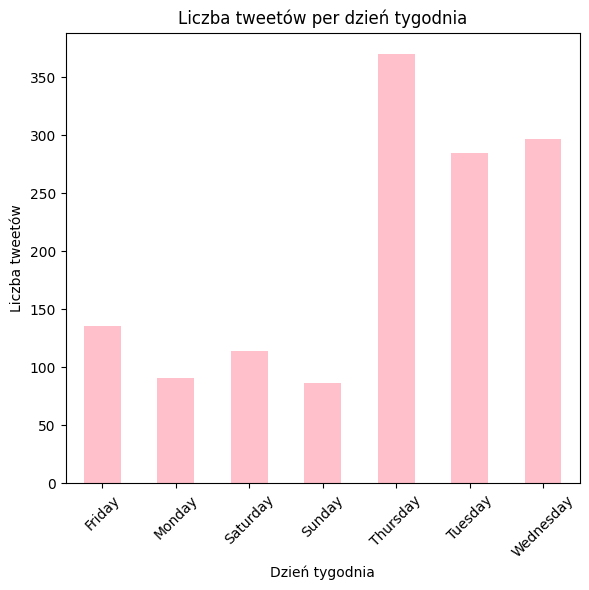

In [76]:
import matplotlib.pyplot as plt

df['created_at'] = pd.to_datetime(df['created_at'])

tweet_counts_per_day = df['created_at'].dt.day_name().value_counts().sort_index()

plt.figure(figsize=(6, 6))
tweet_counts_per_day.plot(kind='bar', color='pink')
plt.title('Liczba tweetów per dzień tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

